# Project: Classification - Loan Eligibility Prediction

Welcome to the project on classification. We will use the credit risk dataset for this problem.

----------------
## Context: 
----------------

Credit risk is the risk of loss resulting from the failure by a borrower to repay the principal and interest owed to the lender. The lender uses the interest payments from the loan to compensate for the risk of potential losses. When the borrower defaults on his/her obligations, it causes an interruption in the cash flow of the lender.

In the banking sector, this is an important factor to be considered before approving the loan of an applicant in order to cushion the lender from loss of cash flow and reduce the severity of losses. 

------------------
## Objective:
------------------

Easy House is a finance company that deals in several varieties of home loans. They have a presence across urban, semi-urban, and rural areas. Currently, the customer first applies for a home loan post which the company validates the customer's eligibility for that loan. 

Now, the company wants to automate the loan eligibility process. They want to harness their past customers' data to build a model to predict whether the loan should be approved or not. This would help the company prevent potential losses, save time and focus more on eligible customers.

--------------------------
## Data Dictionary:
--------------------------

The data contains the following attributes:

* **Loan_ID**: Unique Loan ID
* **Gender**: Gender of the applicant - Male/Female
* **Married**: Whether the applicant is married or not (Yes/No)
* **Dependents**: Number of dependents of the applicant
* **Education**: Applicant's education (Graduate/Not Graduate)
* **Self_Employed**: Whether the applicant is self-employed (Yes/No)
* **ApplicantIncome**: The income of the applicant (\$)
* **CoapplicantIncome**: The co-applicant's income in case of a joint loan and 0 otherwise (\$)
* **LoanAmount**: Loan amount (dollars in thousands) 
* **Loan_Amount_Term**: Term of loan in months
* **Credit_History**: Whether the applicant's credit history meets required guidelines
* **Property_Area**: The area the property pertaining to the loan belongs to - Urban/Semi-Urban/Rural
* **Loan_Status**: Loan approved (1 - Yes, 0 - No)

## Importing necessary libraries and overview of the dataset - Add libraries as needed

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

#algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

#### Loading data

In [ ]:
# data = pd.read_csv("CreditRisk.csv")
# data.head()

import requests
from io import StringIO  

orig_url="https://drive.google.com/file/d/1iZ9g3E-i6nAkM4Pzcqz27Ntz8z77DPgF/view?usp=sharing"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
data = pd.read_csv(csv_raw)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [ ]:
#Checking for the number of rows and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


Need to handle missing data for Gender, Married, Dependents, Self_Employed, Loan_Amount_Term, Credit_History. 

Original thought:
MODE for Gender, Married, Dependents, Self_Employed, Credit_History
Mean or Median for Loan_Amount_Term depending on distribution


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,141.166124,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,88.340630,65.12041,0.364878,0.463973
min,150.000000,0.000000,0.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,98.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,125.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [ ]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [ ]:
#No need for Loan_ID so we drop it from the data frame
data=data.drop(['Loan_ID'],axis=1)

In [ ]:
#Creating Columns for numerical and categorical variables
num_cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term',]
cat_cols=['Dependents','Gender','Married','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']

In [ ]:
#Data exploration and analysis
print(data[num_cols].describe().T)
print(data[cat_cols].mode())

                   count         mean          std    min     25%     50%  \
ApplicantIncome    614.0  5403.459283  6109.041673  150.0  2877.5  3812.5   
CoapplicantIncome  614.0  1621.245798  2926.248369    0.0     0.0  1188.5   
LoanAmount         614.0   141.166124    88.340630    0.0    98.0   125.0   
Loan_Amount_Term   600.0   342.000000    65.120410   12.0   360.0   360.0   

                       75%      max  
ApplicantIncome    5795.00  81000.0  
CoapplicantIncome  2297.25  41667.0  
LoanAmount          164.75    700.0  
Loan_Amount_Term    360.00    480.0  
  Dependents Gender Married Education Self_Employed  Credit_History  \
0          0   Male     Yes  Graduate            No             1.0   

  Property_Area  Loan_Status  
0     Semiurban            1  


##Data Visualization For Quantitative Variables

<function matplotlib.pyplot.show(close=None, block=None)>

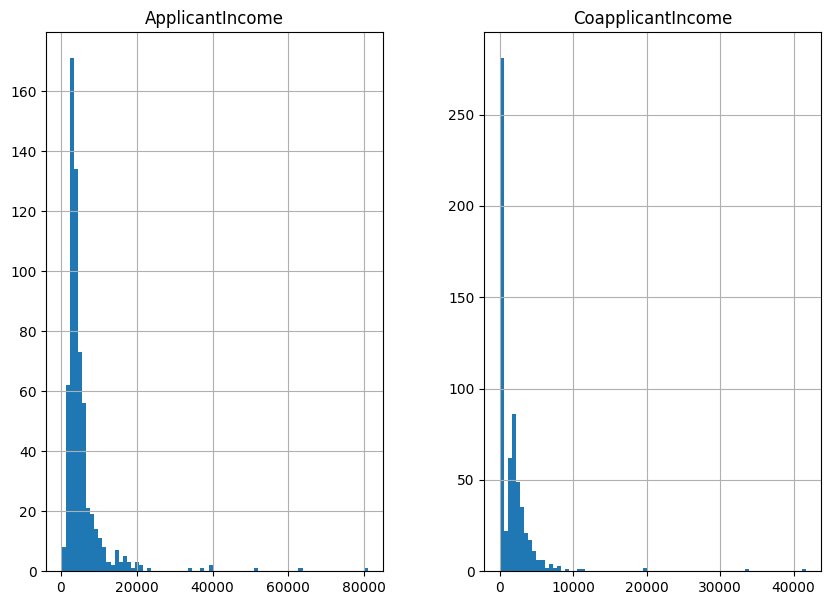

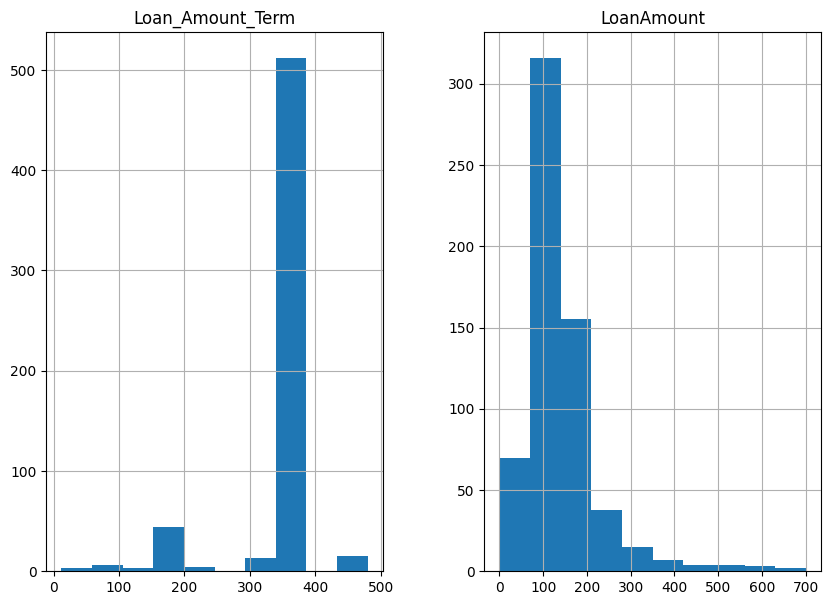

In [ ]:
app=['ApplicantIncome','CoapplicantIncome']
loans=['Loan_Amount_Term','LoanAmount']
data[app].hist(bins=75,figsize=(10,7))
data[loans].hist(bins=10,figsize=(10,7))
plt.show

Data for income looks skewed because of outliers.

Need to Get rid of outliers to see better distribution

In [ ]:
# df1 = data[data['ApplicantIncome'] < 20000]
# df1 = df1[data['CoapplicantIncome']< 20000]
df1 = data

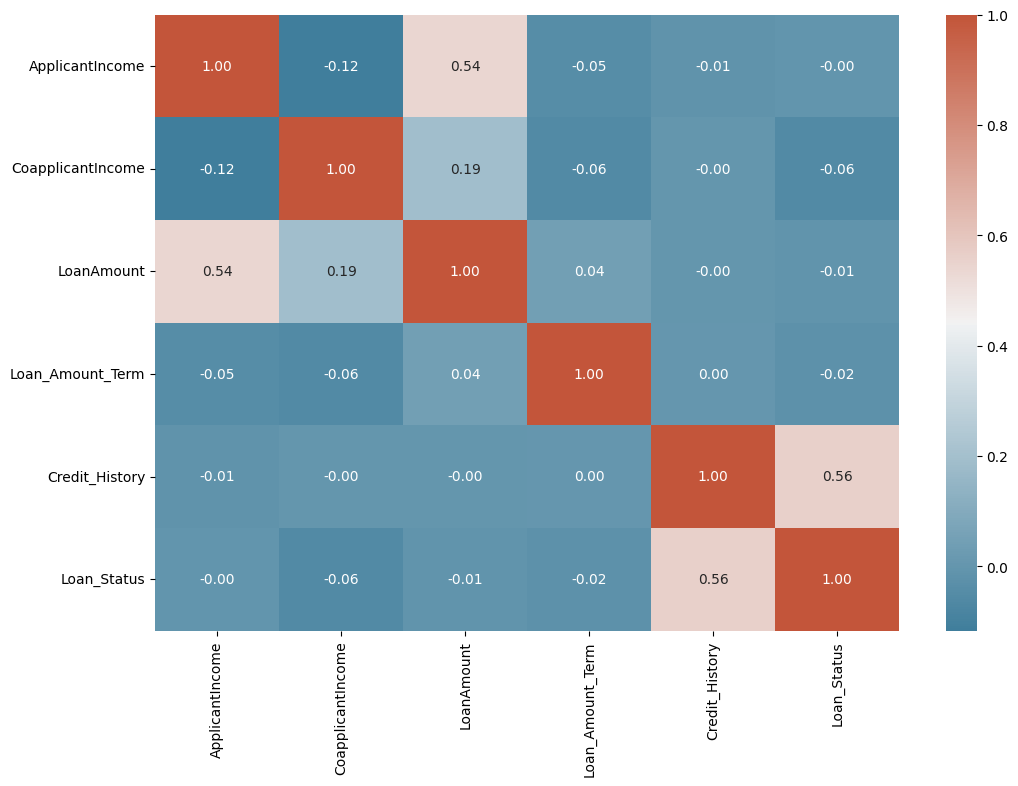

In [ ]:
plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df1.corr(),annot=True,fmt='.2f',cmap=cmap )
plt.show()

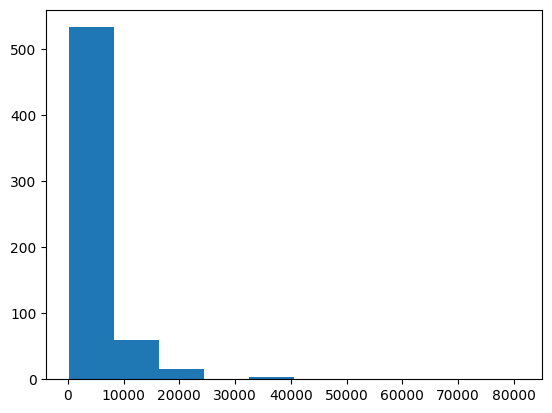

In [ ]:
plt.hist(df1['ApplicantIncome'])
plt.show()

Removing Extreme outliers leads to a higher correlation between income and loan amount. Still no correlation for loan status.

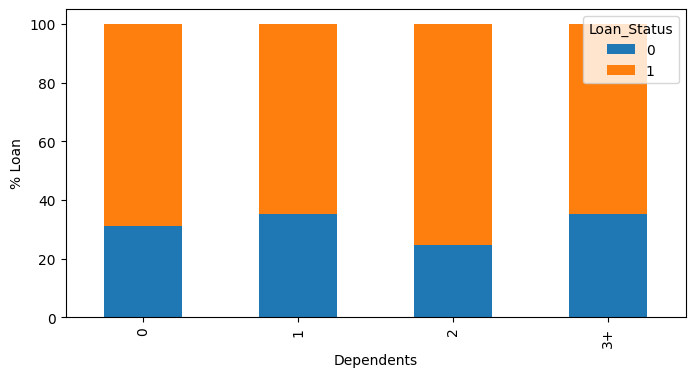

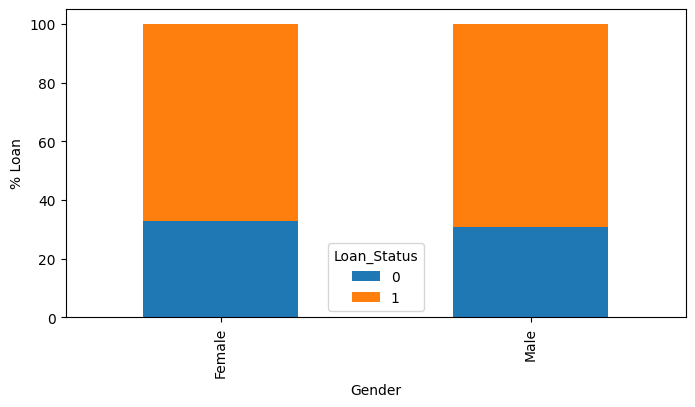

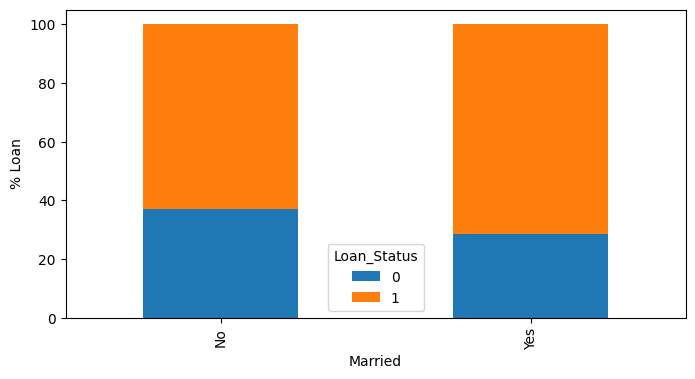

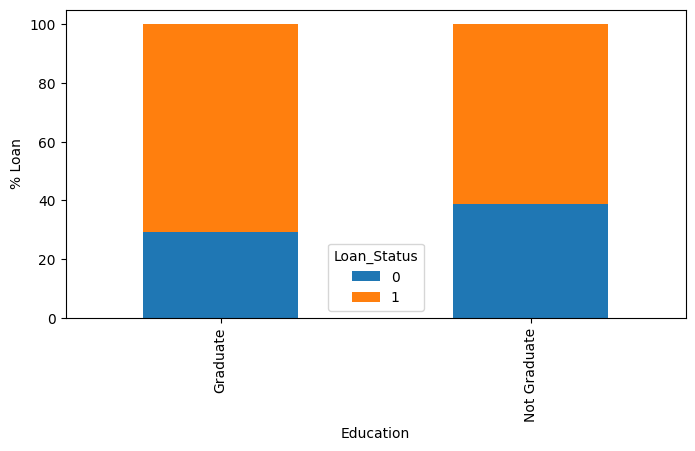

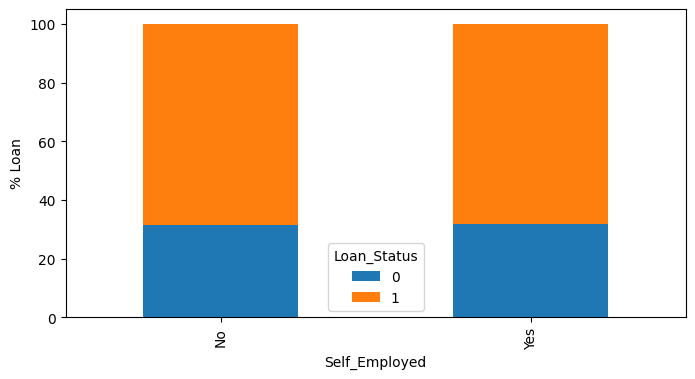

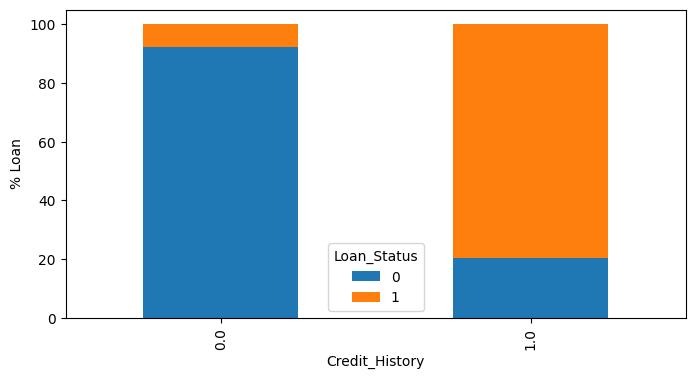

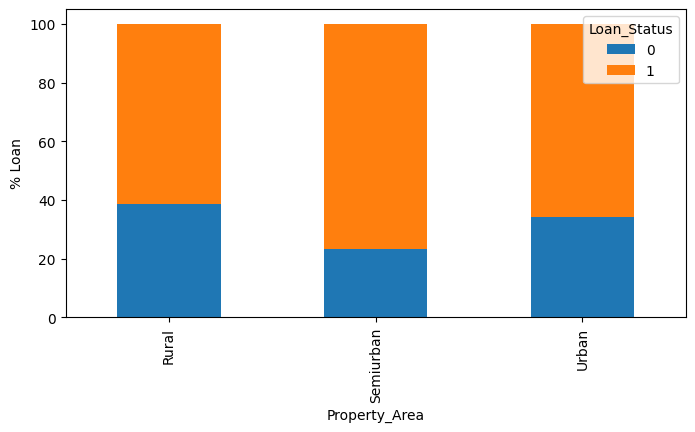

In [ ]:
for i in cat_cols:
    if i!='Loan_Status':
        (pd.crosstab(df1[i],df1['Loan_Status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('% Loan')

**Credit History** is the clear main predictor of loans based off initial analysis

# **Missing Data Handling**




In [ ]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    int64  
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 57.7+ KB


In [ ]:
#Getting mode for categorical data 
for i in cat_cols:
    print(df1[i].value_counts(normalize=True))
    print('*'*40)


# gendermode= str(df1['Gender'].mode())
# marriedmode = str(df1['Married'].mode())
# dependentsmode = str(df1['Dependents'].mode())
# selfemployedmode = str(df1['Self_Employed'].mode())
# loantermmed = df1['Loan_Amount_Term'].median()
# credithistorymode = float(df1['Credit_History'].mode())
# df1.fillna({'Gender':gendermode, 'Married':marriedmode, 'Dependents':dependentsmode,
#             'Self_Employed':selfemployedmode, 'Loan_Amount_Term':loantermmed,
#             'Credit_History':credithistorymode}, inplace=True)
# df1.info()

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64
****************************************
Male      0.813644
Female    0.186356
Name: Gender, dtype: float64
****************************************
Yes    0.651391
No     0.348609
Name: Married, dtype: float64
****************************************
Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64
****************************************
No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64
****************************************
1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64
****************************************
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64
****************************************
1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64
****************************************


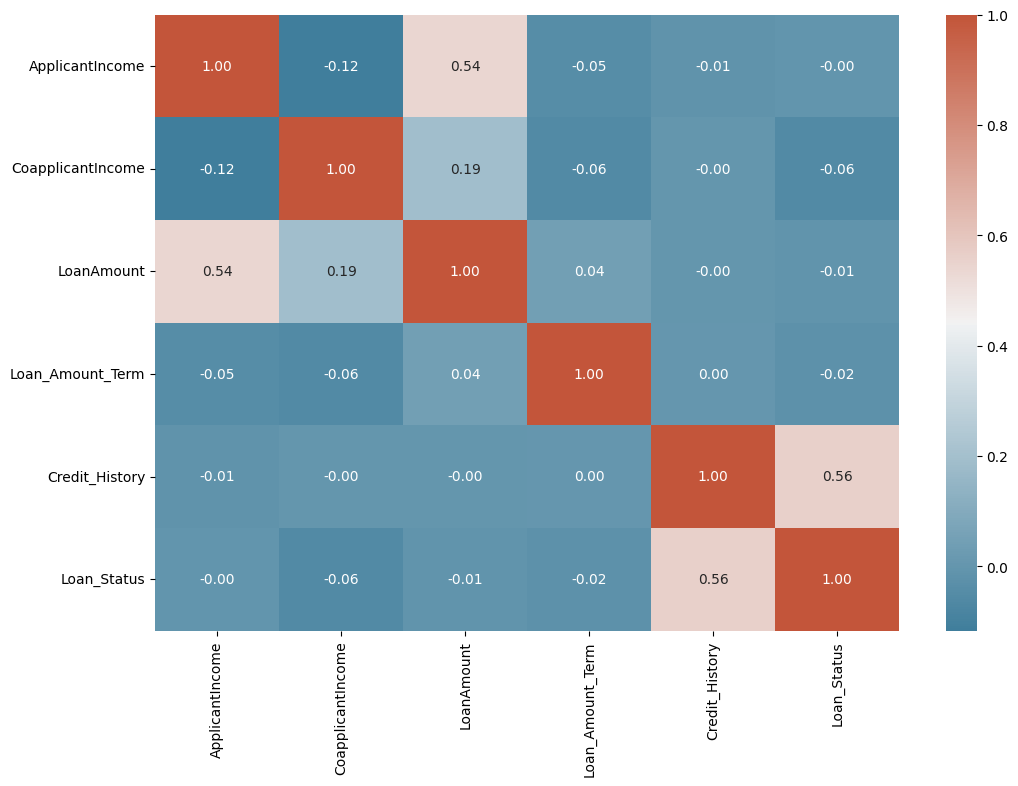

In [ ]:
plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df1.corr(),annot=True,fmt='.2f',cmap=cmap )
plt.show()

# Creating Dummy Variables for categorical variables


In [ ]:
dict_Self_Employed={'Yes':1, 'No':0}
dict_Gender={'Male':1, 'Female':0}
dict_Married={'Yes':1, 'No':0}
dict_Education={"Graduate":1,'Not Graduate':0}
df1['Self_Employed']=df1.Self_Employed.map(dict_Self_Employed)
df1['Gender']=df1.Gender.map(dict_Gender)
df1['Education']=df1.Education.map(dict_Education)
df1['Married']=df1.Married.map(dict_Married)
#creating list of dummies

get_dummies_for = ['Dependents','Property_Area']
#creating dummy variables
df1 = pd.get_dummies(data = df1, columns = get_dummies_for, drop_first = True)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   601 non-null    float64
 1   Married                  611 non-null    float64
 2   Education                614 non-null    int64  
 3   Self_Employed            582 non-null    float64
 4   ApplicantIncome          614 non-null    int64  
 5   CoapplicantIncome        614 non-null    float64
 6   LoanAmount               614 non-null    int64  
 7   Loan_Amount_Term         600 non-null    float64
 8   Credit_History           564 non-null    float64
 9   Loan_Status              614 non-null    int64  
 10  Dependents_1             614 non-null    uint8  
 11  Dependents_2             614 non-null    uint8  
 12  Dependents_3+            614 non-null    uint8  
 13  Property_Area_Semiurban  614 non-null    uint8  
 14  Property_Area_Urban      6

In [ ]:
gendermode= 1
marriedmode = 1
selfemployedmode = 0
loantermmed = df1['Loan_Amount_Term'].median()
credithistorymode = 1
df1.fillna({'Gender':gendermode, 'Married':marriedmode,
            'Self_Employed':selfemployedmode, 'Loan_Amount_Term':loantermmed,
            'Credit_History':credithistorymode}, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   614 non-null    float64
 1   Married                  614 non-null    float64
 2   Education                614 non-null    int64  
 3   Self_Employed            614 non-null    float64
 4   ApplicantIncome          614 non-null    int64  
 5   CoapplicantIncome        614 non-null    float64
 6   LoanAmount               614 non-null    int64  
 7   Loan_Amount_Term         614 non-null    float64
 8   Credit_History           614 non-null    float64
 9   Loan_Status              614 non-null    int64  
 10  Dependents_1             614 non-null    uint8  
 11  Dependents_2             614 non-null    uint8  
 12  Dependents_3+            614 non-null    uint8  
 13  Property_Area_Semiurban  614 non-null    uint8  
 14  Property_Area_Urban      6

# **Splitting the Data**

In [ ]:
#Separating target variable and other variables
y= df1['Loan_Status']
X= df1.drop(columns = ['Loan_Status'])

In [ ]:
# scale = StandardScaler()
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,0.472343,-1.372089,0.528362,-0.392601,0.072991,-0.554487,-1.599278,0.273231,0.411733,-0.446339,-0.443713,-0.300975,-0.782016,1.428147
1,0.472343,0.728816,0.528362,-0.392601,-0.134412,-0.038732,-0.149160,0.273231,0.411733,2.240448,-0.443713,-0.300975,-0.782016,-0.700208
2,0.472343,0.728816,0.528362,2.547117,-0.393747,-0.554487,-0.851561,0.273231,0.411733,-0.446339,-0.443713,-0.300975,-0.782016,1.428147
3,0.472343,0.728816,-1.892641,-0.392601,-0.462062,0.251980,-0.239792,0.273231,0.411733,-0.446339,-0.443713,-0.300975,-0.782016,1.428147
4,0.472343,-1.372089,0.528362,-0.392601,0.097728,-0.554487,-0.001882,0.273231,0.411733,-0.446339,-0.443713,-0.300975,-0.782016,1.428147


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30 , random_state=1,stratify=y)

In [ ]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['No Loan', 'Loan'], yticklabels=['No Loan', 'Loan'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## **Tree Induction**

In [ ]:
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 8
dt = DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

## **Checking Model Performance**

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       134
           1       0.94      0.97      0.96       295

    accuracy                           0.94       429
   macro avg       0.94      0.92      0.93       429
weighted avg       0.94      0.94      0.94       429



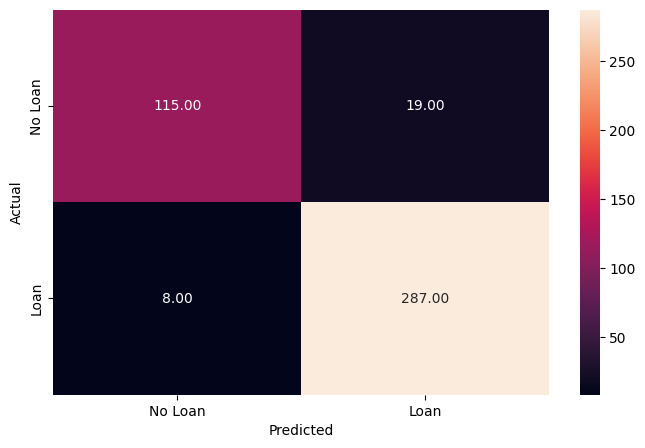

In [ ]:
#checking model performace of dt
y_pred_train_dt = dt.predict(X_train)
metrics_score(y_train, y_pred_train_dt)

              precision    recall  f1-score   support

           0       0.59      0.57      0.58        58
           1       0.81      0.82      0.81       127

    accuracy                           0.74       185
   macro avg       0.70      0.69      0.70       185
weighted avg       0.74      0.74      0.74       185



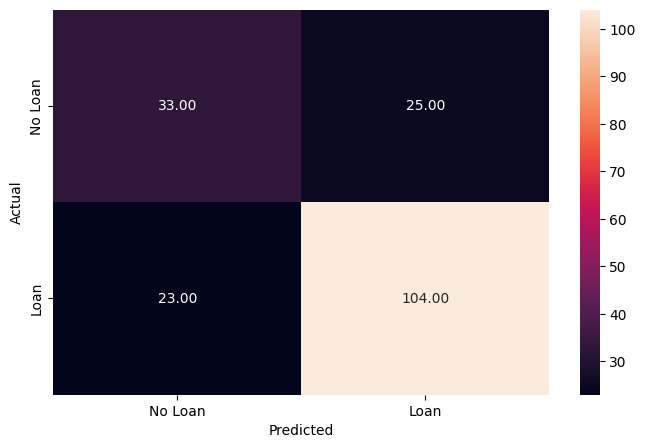

In [ ]:
y_pred_test_dt = dt.predict(X_test)
metrics_score(y_test, y_pred_test_dt)

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': dt.feature_importances_
})

importances = importances.sort_values(by='Importance', ascending=False)
importances

,Attribute,Importance
8,Credit_History,0.281157
6,LoanAmount,0.198456
4,ApplicantIncome,0.186743
5,CoapplicantIncome,0.109821
1,Married,0.051729
2,Education,0.037403
11,Dependents_3+,0.029637
7,Loan_Amount_Term,0.021868
9,Dependents_1,0.020845
3,Self_Employed,0.017112


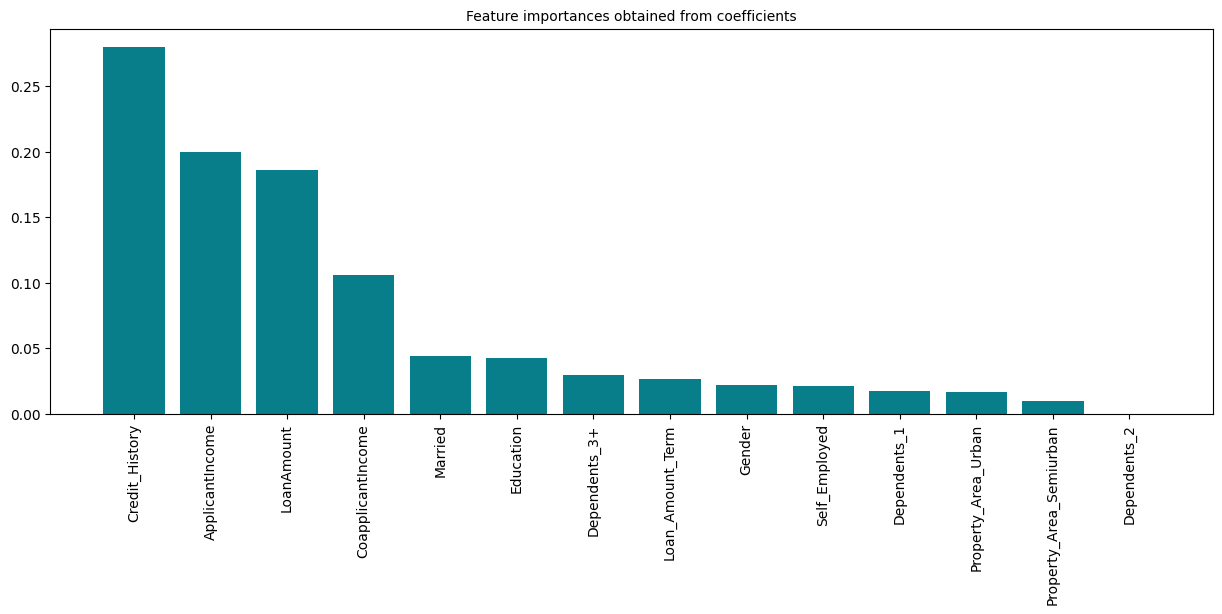

In [ ]:
plt.figure(figsize=(15,5))

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=10)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
X_train1=X_train.drop(columns=['Property_Area_Semiurban','Education'])
X_test1=X_test.drop(columns=['Property_Area_Semiurban','Education'])

In [ ]:
dt.fit(X_train1, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       134
           1       0.99      1.00      1.00       295

    accuracy                           1.00       429
   macro avg       1.00      0.99      0.99       429
weighted avg       1.00      1.00      1.00       429



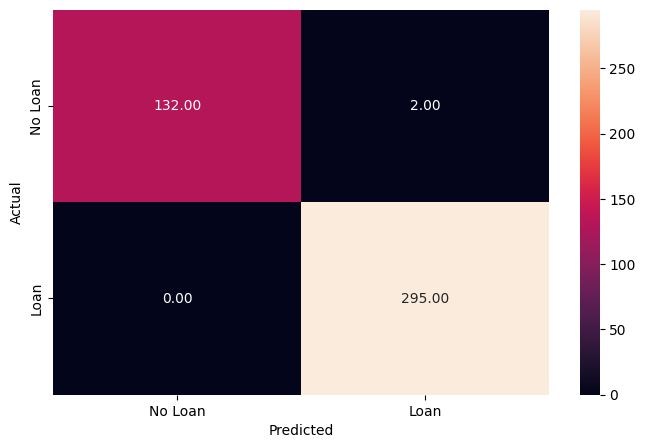

In [ ]:
y_pred_train_dt = dt.predict(X_train1)
metrics_score(y_train, y_pred_train_dt)

              precision    recall  f1-score   support

           0       0.56      0.60      0.58        58
           1       0.81      0.79      0.80       127

    accuracy                           0.73       185
   macro avg       0.69      0.70      0.69       185
weighted avg       0.74      0.73      0.73       185



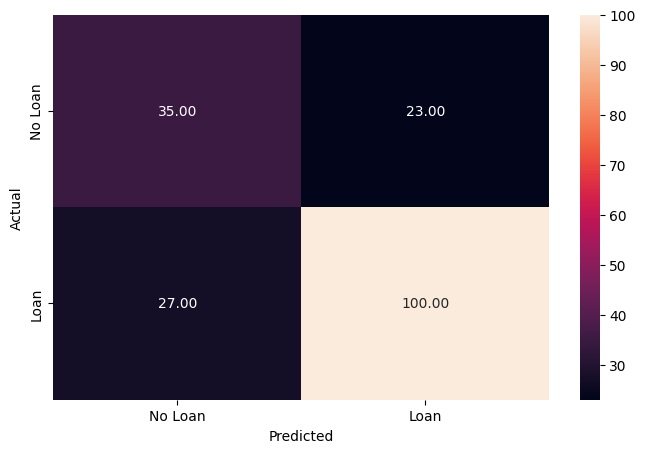

In [ ]:
y_pred_test_dt = dt.predict(X_test1)
metrics_score(y_test, y_pred_test_dt)

## **Logistic Regression**

In [ ]:
#fitting logistic regression model
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

## **Checking Model Performance**

              precision    recall  f1-score   support

           0       0.89      0.44      0.59       134
           1       0.79      0.98      0.88       295

    accuracy                           0.81       429
   macro avg       0.84      0.71      0.73       429
weighted avg       0.82      0.81      0.79       429



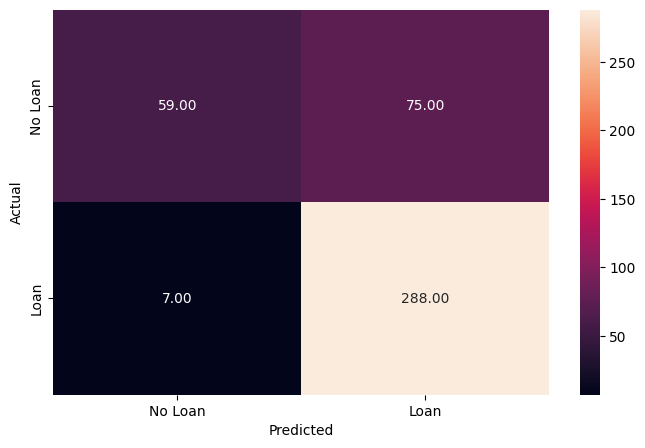

In [ ]:
#checking the performance on the training data
y_pred_train = lg.predict(X_train)
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.96      0.43      0.60        58
           1       0.79      0.99      0.88       127

    accuracy                           0.82       185
   macro avg       0.88      0.71      0.74       185
weighted avg       0.85      0.82      0.79       185



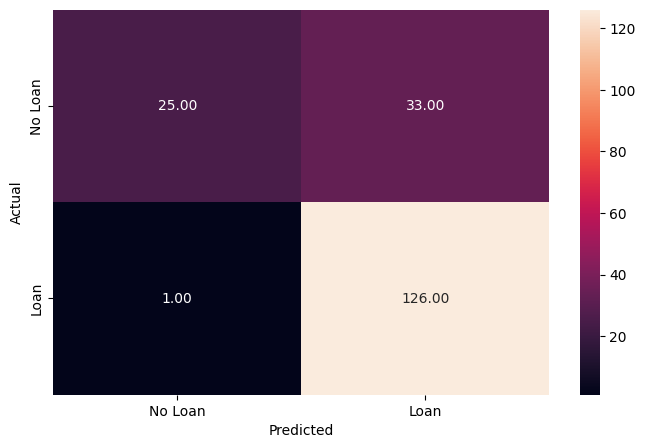

In [ ]:
y_pred_test_dt = lg.predict(X_test)
metrics_score(y_test, y_pred_test_dt)

In [ ]:
#printing the coefficients of logistic regression
cols=X.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)

,0
Credit_History,1.214303
Property_Area_Semiurban,0.523135
Married,0.263223
Dependents_2,0.142491
Property_Area_Urban,0.131955
Education,0.128421
ApplicantIncome,0.047705
Gender,-0.039571
LoanAmount,-0.067930
Dependents_3+,-0.079988


In [ ]:
odds = np.exp(lg.coef_[0]) #finding the odds

# adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, X_train.columns, columns=['odds']).sort_values(by='odds', ascending=False) 

,odds
Credit_History,3.367947
Property_Area_Semiurban,1.687309
Married,1.301117
Dependents_2,1.153142
Property_Area_Urban,1.141057
Education,1.137032
ApplicantIncome,1.048861
Gender,0.961201
LoanAmount,0.934326
Dependents_3+,0.923127


In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

              precision    recall  f1-score   support

           0       0.89      0.44      0.59       134
           1       0.79      0.98      0.88       295

    accuracy                           0.81       429
   macro avg       0.84      0.71      0.73       429
weighted avg       0.82      0.81      0.79       429



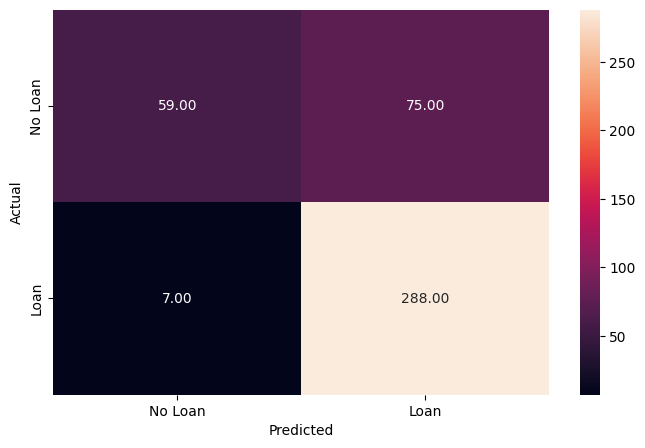

In [ ]:
y_pred_train_lda = lda.predict(X_train)
metrics_score(y_train, y_pred_train_lda)

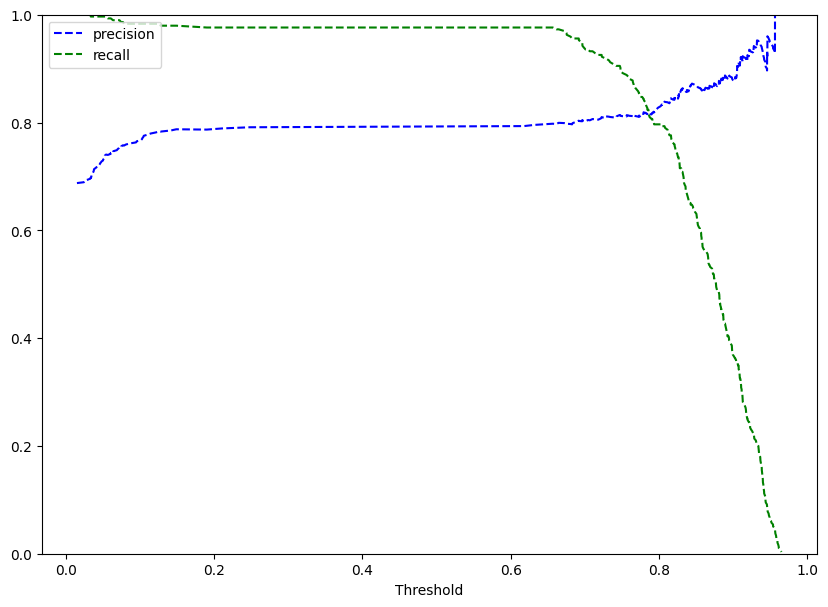

In [ ]:
y_scores_lda=lda.predict_proba(X_train) #predict_proba gives the probability of each observation belonging to each class


precisions_lda, recalls_lda, thresholds_lda = precision_recall_curve(y_train, y_scores_lda[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lda, precisions_lda[:-1], 'b--', label='precision')
plt.plot(thresholds_lda, recalls_lda[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

              precision    recall  f1-score   support

           0       0.62      0.59      0.61       134
           1       0.82      0.84      0.83       295

    accuracy                           0.76       429
   macro avg       0.72      0.71      0.72       429
weighted avg       0.76      0.76      0.76       429



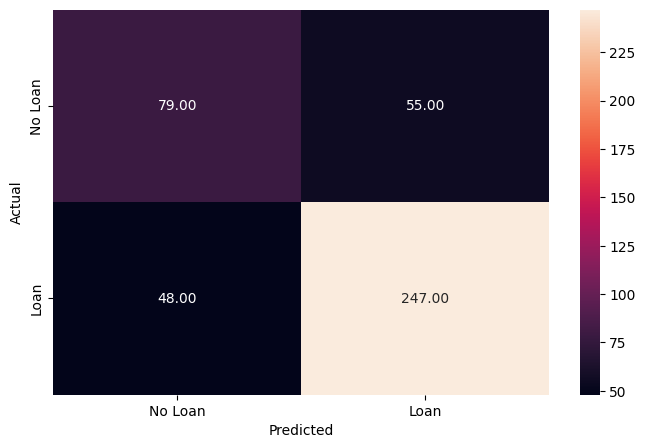

In [ ]:
optimal_threshold1=.78
y_pred_train_lda = lda.predict_proba(X_train)
metrics_score(y_train, y_pred_train_lda[:,1]>optimal_threshold1)

              precision    recall  f1-score   support

           0       0.62      0.59      0.60        58
           1       0.82      0.83      0.82       127

    accuracy                           0.76       185
   macro avg       0.72      0.71      0.71       185
weighted avg       0.75      0.76      0.75       185



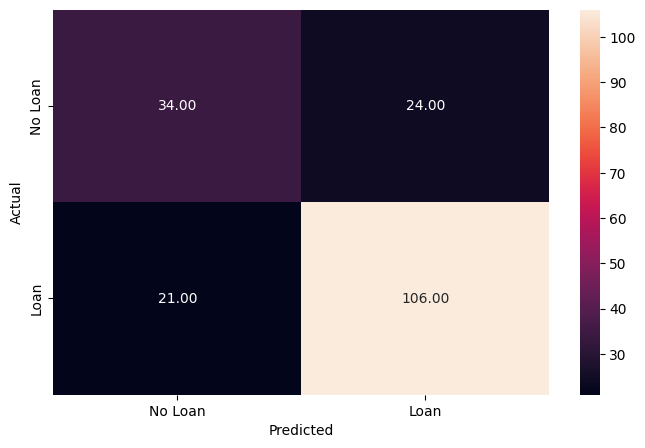

In [ ]:
optimal_threshold1=.77
y_pred_test_lda = lda.predict_proba(X_test)
metrics_score(y_test, y_pred_test_lda[:,1]>optimal_threshold1)

In [ ]:
knn = KNeighborsClassifier()

# We select the best value of k for which the error rate is the least in the validation data
# Let us loop over a few values of the k to determine the best k

train_error = []
test_error = []
knn_many_split = {}

error_df_knn = pd.DataFrame()
features = X.columns

for k in range(1,15):
    train_error = []
    test_error = []
    lista = []
    knn = KNeighborsClassifier(n_neighbors=k)
    for i in range(30):
        x_train_new, x_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size = 0.20)
    
        #Fitting knn on training data
        knn.fit(x_train_new, y_train_new)
        #Calculating error on training and validation data
        train_error.append(1 - knn.score(x_train_new, y_train_new)) 
        test_error.append(1 - knn.score(x_val, y_val))
    lista.append(sum(train_error)/len(train_error))
    lista.append(sum(test_error)/len(test_error))
    knn_many_split[k] = lista

knn_many_split

{1: [0.0, 0.3081395348837209],
 2: [0.12944606413994167, 0.325968992248062],
 3: [0.1592808551992225, 0.26511627906976737],
 4: [0.1699708454810496, 0.2833333333333333],
 5: [0.18260447035957236, 0.24534883720930237],
 6: [0.18347910592808556, 0.2643410852713178],
 7: [0.19504373177842574, 0.22596899224806197],
 8: [0.1894071914480078, 0.23837209302325588],
 9: [0.20087463556851315, 0.22209302325581395],
 10: [0.19941690962099132, 0.22945736434108532],
 11: [0.20515063168124398, 0.21240310077519378],
 12: [0.20233236151603498, 0.2298449612403101],
 13: [0.20602526724975703, 0.2255813953488372],
 14: [0.2062196307094266, 0.20813953488372103]}

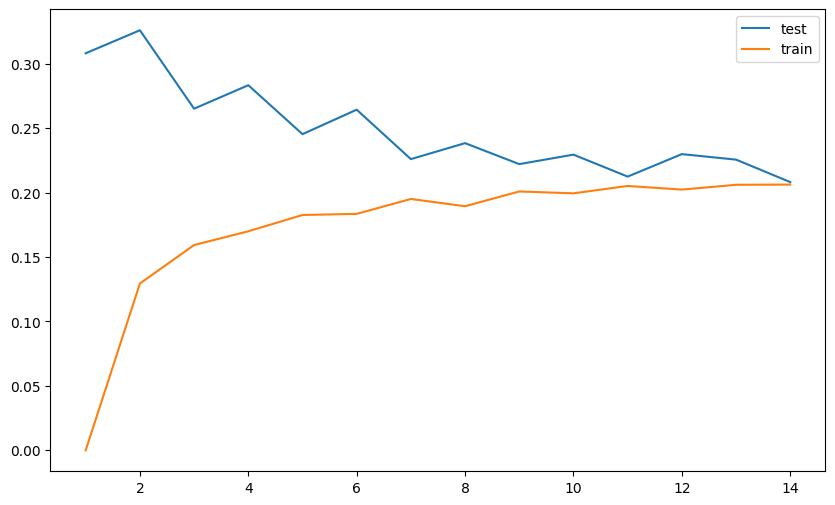

In [ ]:
kltest = []
vltest = []
for k, v in knn_many_split.items():
    kltest.append(k)
    vltest.append(knn_many_split[k][1])

kltrain = []
vltrain = []

for k, v in knn_many_split.items():
    kltrain.append(k)
    vltrain.append(knn_many_split[k][0])

# Plotting k vs error error
plt.figure(figsize=(10,6))
plt.plot(kltest,vltest, label = 'test' )
plt.plot(kltrain,vltrain, label = 'train')
plt.legend()
plt.show()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.86      0.47      0.61       134
           1       0.80      0.97      0.88       295

    accuracy                           0.81       429
   macro avg       0.83      0.72      0.74       429
weighted avg       0.82      0.81      0.79       429



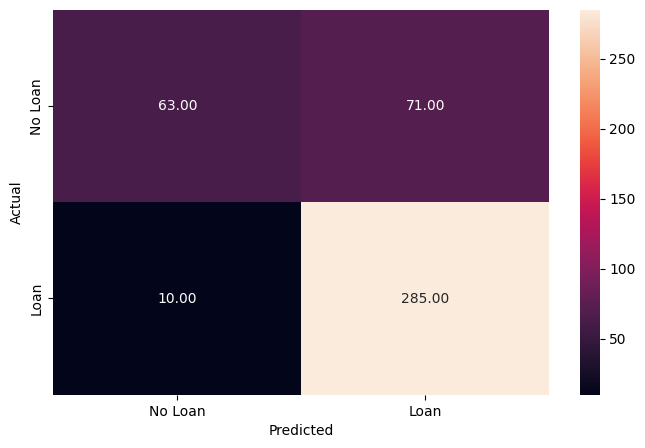

In [ ]:
y_pred_train_knn = knn.predict(X_train)
metrics_score(y_train, y_pred_train_knn)

              precision    recall  f1-score   support

           0       0.70      0.45      0.55        58
           1       0.78      0.91      0.84       127

    accuracy                           0.77       185
   macro avg       0.74      0.68      0.70       185
weighted avg       0.76      0.77      0.75       185



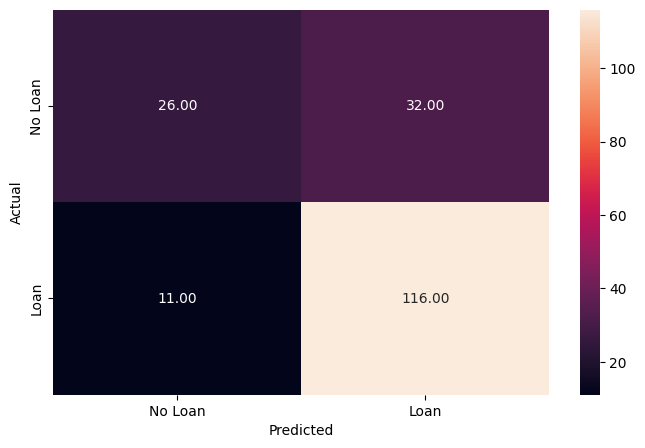

In [ ]:
y_pred_test_knn = knn.predict(X_test)
metrics_score(y_test, y_pred_test_knn)

In [ ]:
knn.fit(X_train1,y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.85      0.52      0.65       134
           1       0.82      0.96      0.88       295

    accuracy                           0.82       429
   macro avg       0.83      0.74      0.76       429
weighted avg       0.83      0.82      0.81       429



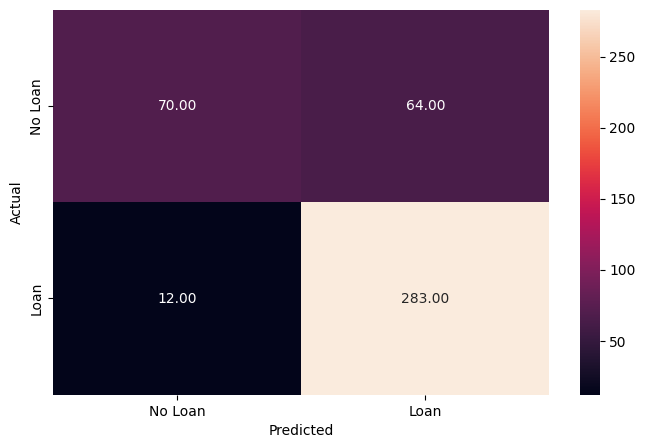

In [ ]:
y_pred_train_knn = knn.predict(X_train1)
metrics_score(y_train, y_pred_train_knn)

              precision    recall  f1-score   support

           0       0.76      0.43      0.55        58
           1       0.78      0.94      0.85       127

    accuracy                           0.78       185
   macro avg       0.77      0.68      0.70       185
weighted avg       0.77      0.78      0.76       185



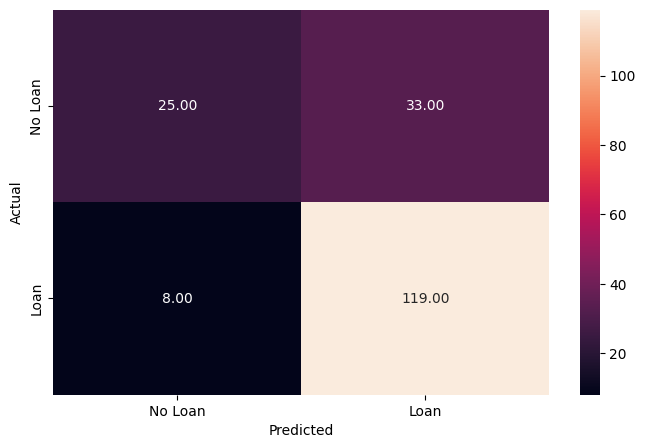

In [ ]:
y_pred_test_knn = knn.predict(X_test1)
metrics_score(y_test, y_pred_test_knn)